In [1]:
from fastai.vision.all import *

# Multi Label Image Classification

This example shows how multi label classification ("tagging") can be learned by a deep neural network.

In [2]:
# getting the data set and taking a look inside
path = untar_data(URLs.PASCAL_2007)
Path.BASE_PATH = path # type: ignore
path.ls() # type: ignore

(#8) [Path('segmentation'),Path('test'),Path('test.csv'),Path('test.json'),Path('train'),Path('train.csv'),Path('train.json'),Path('valid.json')]

In [ ]:
# Using Pandas (see tutorial Jupyter Notebook in Canvas)
# https://pandas.pydata.org/docs/

# read the train.csv file and take a look at the header
df = pd.read_csv(path/'train.csv')
print(df)

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


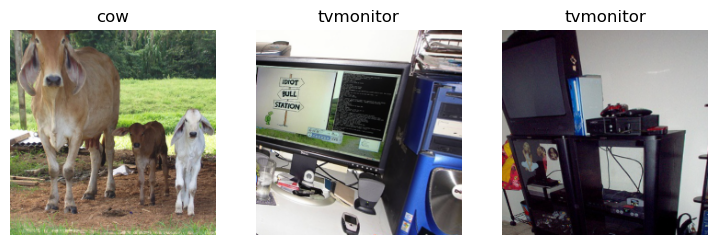

In [6]:
pascal = DataBlock(
    # MultiCategoryBlock is new and means we can get multiple classes as output
    blocks=(ImageBlock, MultiCategoryBlock), # type: ignore
    
    # ColSplitter and ColReader do the work.
    splitter=ColSplitter('is_valid'),
    get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
    get_y=ColReader('labels', label_delim=' '),
    
    # Resizing all images to the same size on CPU
    item_tfms = Resize(460), # type: ignore
    
    # augmenting our data to avoid overfitting on GPU
    batch_tfms=aug_transforms(size=224, min_scale=0.25))

dls = pascal.dataloaders(df)

dls.show_batch(max_n=3)

In [7]:
# accuracy_multi and thresh=0.5 is new here. 
# accuracy_multi is accuracy for multilabel classification
# thresh=0.5 means that a tag is given when the certainty of the model is at least 50%
learn = cnn_learner(dls, resnet34, metrics=partial(accuracy_multi, thresh=0.5))

c:\Users\Normans-PC\miniconda3\envs\fastai_env\lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
learn.fine_tune(20) # we use transfer learning as usual
learn.show_results()

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.845012,0.565187,0.719641,01:04


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.684121,0.507821,0.773864,00:41
1,0.637351,0.442317,0.837410,00:41


In [11]:
interp = Interpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,bicycle;person,aeroplane;sheep,"tensor([9.5275e-01, 9.2238e-04, 3.7695e-04, 4.8524e-03, 1.2960e-03, 5.3224e-03, 1.9729e-02, 9.5536e-04, 2.1159e-03, 3.3398e-03, 8.6462e-04, 8.1465e-03, 1.6023e-03, 1.6198e-02, 6.3157e-03, 7.4645e-03,\n 5.3483e-01, 3.9853e-02, 1.8544e-03, 4.2032e-03])",0.79951411485672
1,chair;dog;person;pottedplant;sofa;tvmonitor,person;sofa,"tensor([3.9249e-04, 1.8986e-03, 1.7719e-03, 2.8767e-03, 4.7139e-03, 1.6561e-03, 3.5240e-01, 2.6453e-03, 2.7542e-02, 8.1352e-04, 5.9456e-04, 1.1066e-01, 3.2024e-03, 1.5716e-03, 9.9972e-01, 1.3655e-01,\n 1.4475e-03, 9.9394e-01, 1.0289e-03, 1.3056e-03])",0.7445526123046875
2,dog;pottedplant;sofa;tvmonitor,cat,"tensor([1.4617e-03, 7.3161e-04, 7.0009e-04, 1.6118e-03, 1.1070e-02, 1.5619e-03, 2.2860e-03, 9.8735e-01, 2.2584e-01, 2.8931e-03, 6.4445e-03, 1.8769e-01, 1.6703e-03, 2.3771e-03, 2.1017e-02, 6.5476e-02,\n 1.5172e-03, 1.4458e-01, 1.1146e-03, 4.1177e-02])",0.7102712988853455
3,bottle;cow;person,chair;person,"tensor([4.2021e-04, 1.0815e-03, 2.2252e-03, 1.2273e-03, 1.3948e-02, 1.1984e-03, 2.3004e-03, 2.0085e-02, 8.6341e-01, 2.3114e-03, 2.8524e-02, 4.8402e-03, 4.1670e-02, 2.4128e-03, 8.8705e-01, 2.1299e-01,\n 2.3443e-03, 1.1036e-01, 9.7583e-04, 2.4837e-02])",0.6472703814506531
4,bicycle;chair;diningtable,bicycle,"tensor([9.2663e-04, 9.9983e-01, 2.7499e-04, 3.9361e-04, 4.4649e-02, 2.7368e-03, 9.7277e-04, 2.7329e-03, 3.5103e-03, 1.4241e-03, 1.0733e-03, 6.3255e-04, 2.3245e-04, 1.0495e-04, 9.8721e-03, 1.7764e-03,\n 8.3186e-04, 1.9034e-03, 3.6765e-04, 3.2626e-03])",0.6281701922416687
5,bicycle;motorbike;person,car;person,"tensor([3.4055e-04, 1.7904e-02, 2.3915e-03, 1.2159e-03, 2.2302e-03, 2.1534e-01, 9.7922e-01, 5.3101e-03, 2.2776e-02, 1.6088e-03, 6.6070e-03, 2.2324e-03, 3.5005e-03, 1.9762e-02, 6.8523e-01, 1.3363e-02,\n 1.4846e-03, 3.3811e-03, 1.4062e-03, 2.4537e-03])",0.625575840473175
6,boat;person,car;person,"tensor([6.3600e-04, 4.7586e-03, 1.1800e-03, 1.5467e-02, 1.7794e-03, 1.5739e-03, 9.9943e-01, 7.4203e-04, 4.2835e-03, 2.8682e-03, 2.3477e-03, 8.1174e-03, 1.4643e-02, 1.2219e-02, 9.8044e-01, 2.1328e-03,\n 2.3277e-03, 4.5149e-03, 2.5143e-03, 1.2615e-03])",0.5864241123199463
7,person;tvmonitor,bottle;diningtable;person,"tensor([1.1367e-03, 1.8164e-03, 1.1376e-03, 3.4144e-03, 7.4654e-01, 3.7746e-04, 1.8984e-03, 1.4393e-03, 4.0430e-01, 1.4254e-03, 9.6991e-01, 3.1395e-04, 1.0535e-03, 4.0758e-04, 9.6305e-01, 1.7170e-01,\n 1.1832e-03, 1.6475e-03, 1.0755e-03, 3.0223e-03])",0.5720065236091614


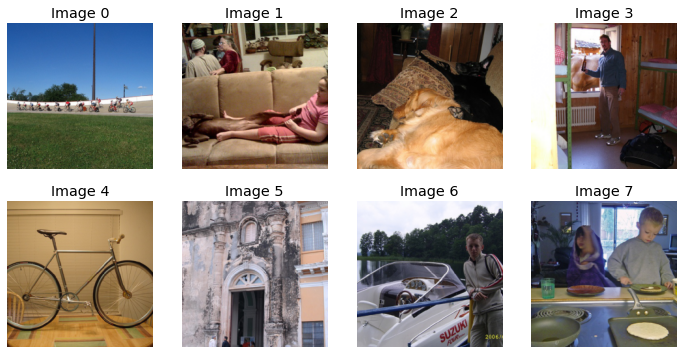

In [14]:
interp.plot_top_losses(8)